In [3]:
import networkx as nx
import matplotlib.pyplot as plt

graphml_file="/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/summarized_graph.graphml"
G=nx.read_graphml(graphml_file)
nodes=G.nodes(data=True)
edges=G.edges(data=True)
print(len(nodes))
print(len(edges))

686
1049


In [4]:
list(nodes)[1]

('CHARLES DICKENS',
 {'type': 'PERSON',
  'description': 'Charles Dickens is a renowned author best known for his classic novella, "A Christmas Carol," which was published in 1843. This work explores profound themes of redemption and the spirit of Christmas, making it a timeless piece of literature that continues to resonate with readers today.',
  'source_id': '680dd6d2a970a49082fa4f34bf63a34e,7e0f328a83e4cab1025bc5e27fb32cc6,95f1f8f5bdbf0bee3a2c6f2f4a4907f6'})

In [5]:
list(edges)[1]

('PROJECT GUTENBERG',
 'FULL LICENSE',
 {'weight': 1.0,
  'description': 'The Full Project Gutenberg License outlines the terms of use and redistribution for works associated with Project Gutenberg',
  'source_id': '50160bdfa976f5b946c699722c81b412'})

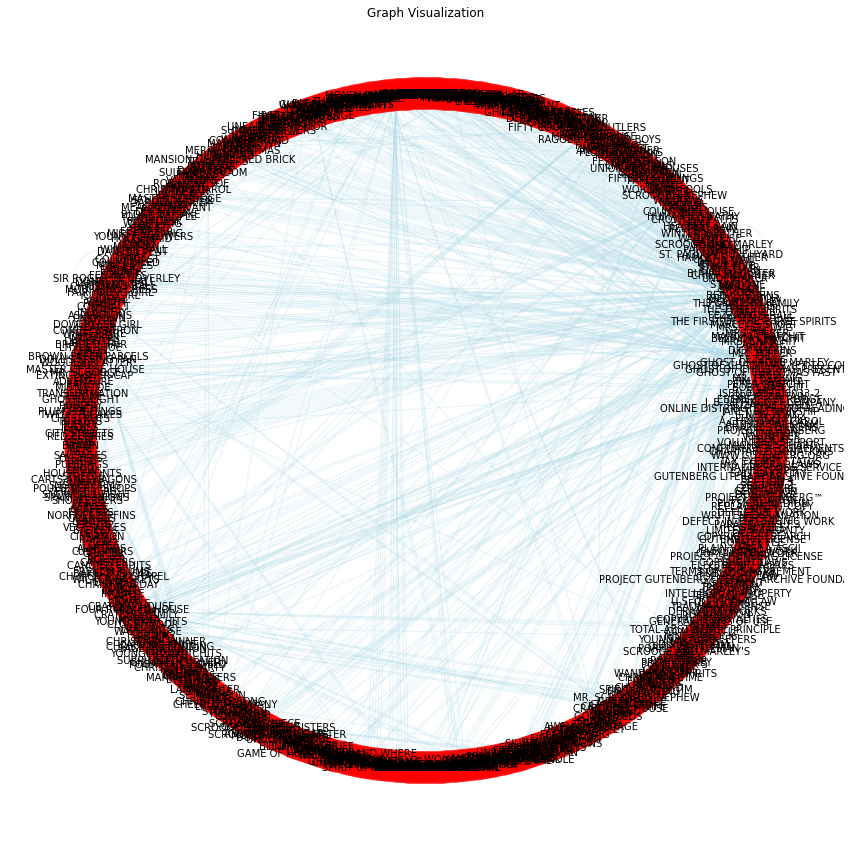

In [6]:
# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='red',alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

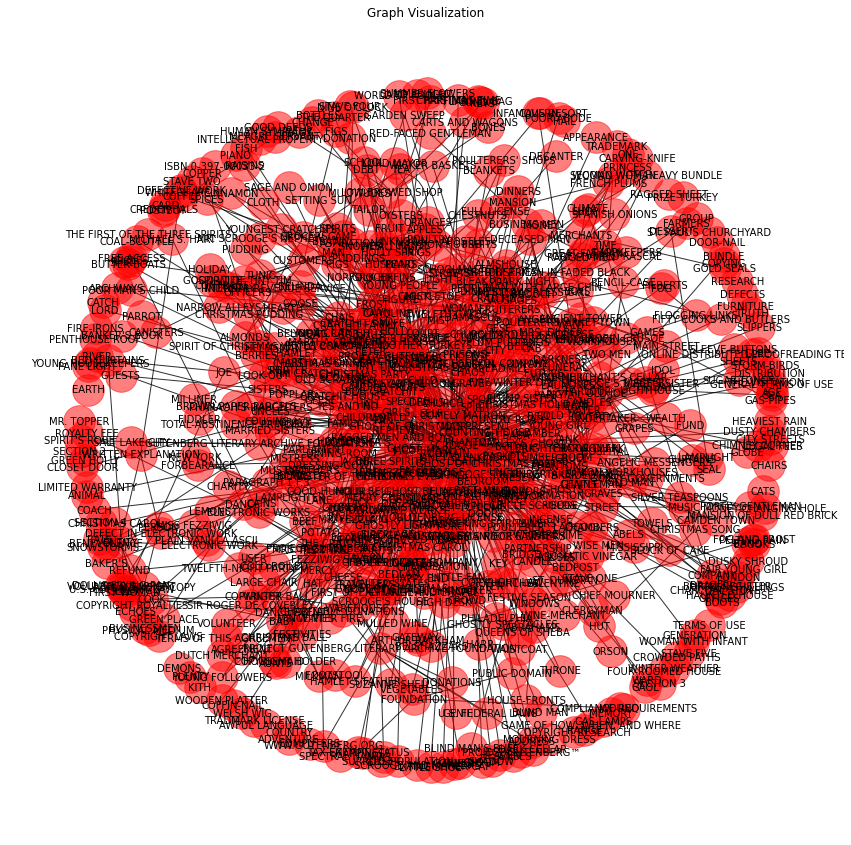

In [7]:
import numpy as np
np.random.seed(2024)

# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G,k=2.5, iterations=400,threshold=1e-4)

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='red',alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import leidenalg
import igraph as ig
# Convert NetworkX graph to igraph
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
# Perform community detection using the Leiden algorithm
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)

In [9]:
community_assignments = {}
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]  # Map node index to node name
        community_assignments[node_name] = community_id
community_assignments

{'CHRISTMAS EVE': 0,
 'HEART': 0,
 'CAINS': 0,
 'THE QUARTER': 0,
 'THE CLOCK': 0,
 'HOUR BELL': 0,
 'CURTAINS': 0,
 'BED': 0,
 'UNEARTHLY VISITOR': 0,
 'TUNIC': 0,
 'BAND': 0,
 'FIGURE': 0,
 'LIGHT': 0,
 'WINTER DAY': 0,
 'FIELDS': 0,
 'BRIDGE': 0,
 'RIVER': 0,
 'FARMERS': 0,
 'MERRY CHRISTMAS': 0,
 'MANSION': 0,
 'CHILD': 0,
 'HIGH-ROAD': 0,
 'LANE': 0,
 'MANSION OF DULL RED BRICK': 0,
 'BOY': 0,
 'POPPLAR': 0,
 'HOUSE': 0,
 'DAMASCUS': 0,
 "SULTAN'S GROOM": 0,
 'PRINCESS': 0,
 'ORSON': 0,
 'GENII': 0,
 'VALENTINE': 0,
 'ROBIN CRUSOE': 0,
 'FRIDAY': 0,
 'PARROT': 0,
 'CHRISTMAS CAROL': 0,
 'LITTLE FAN': 0,
 'COACH': 0,
 'FATHER': 0,
 'SCHOOLMASTER': 0,
 'GARDEN SWEEP': 0,
 'CHAIS': 0,
 'MEAGRE SERVANT': 0,
 'POSTBOY': 0,
 'DECANTER': 0,
 'BLOCK OF CAKE': 0,
 'YOUNG PEOPLE': 0,
 'SCHOOL': 0,
 'HIGH DESK': 0,
 'WELSH WIG': 0,
 'DICK': 0,
 'EBENEZER': 0,
 'MISS FEZZIWIG': 0,
 'YOUNG FOLLOWERS': 0,
 'MILKMAN': 0,
 'WINTER BALL': 0,
 'DANCE EVENT': 0,
 'GIRL': 0,
 'DANCE': 0,
 'COLD ROAST

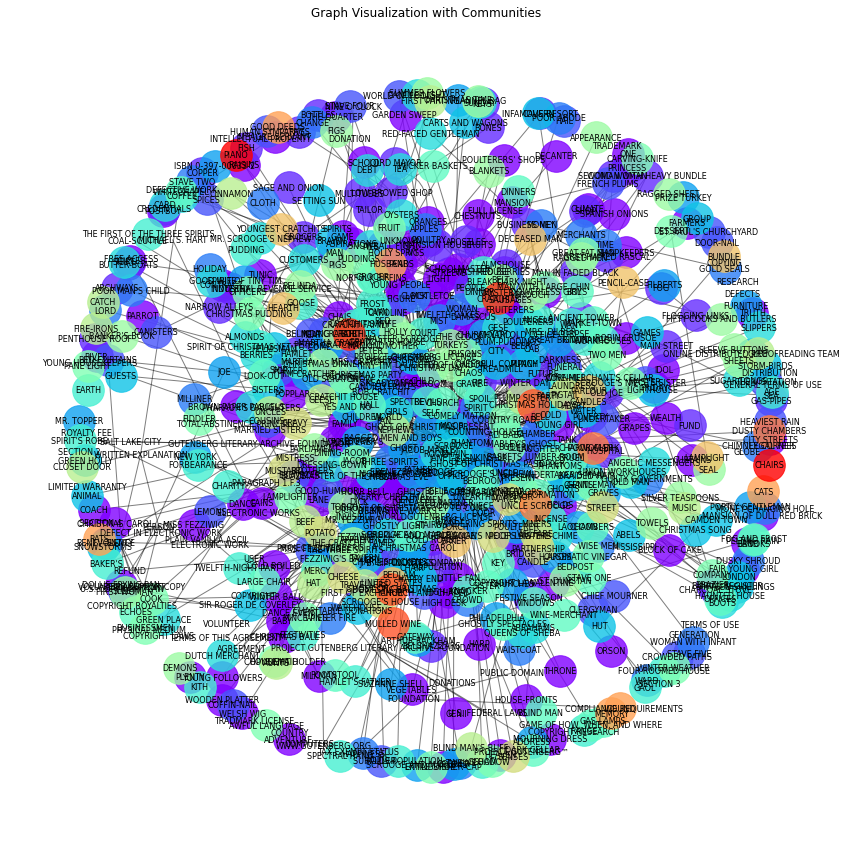

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(2024)

# Convert partition into a dictionary where keys are node names, not indices
community_assignments = {}
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]  # Map node index to node name
        community_assignments[node_name] = community_id

num_communities = len(set(community_assignments.values()))

# Assign colors to each community
colors = plt.cm.rainbow(np.linspace(0, 1, num_communities))
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=2.5, iterations=400, threshold=1e-4)

for node, community_id in community_assignments.items():
    if node in pos:  
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[node],
                               node_size=1000,
                               node_color=[colors[community_id]],
                               alpha=0.8)

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization with Communities")
plt.axis('off') 
plt.show()

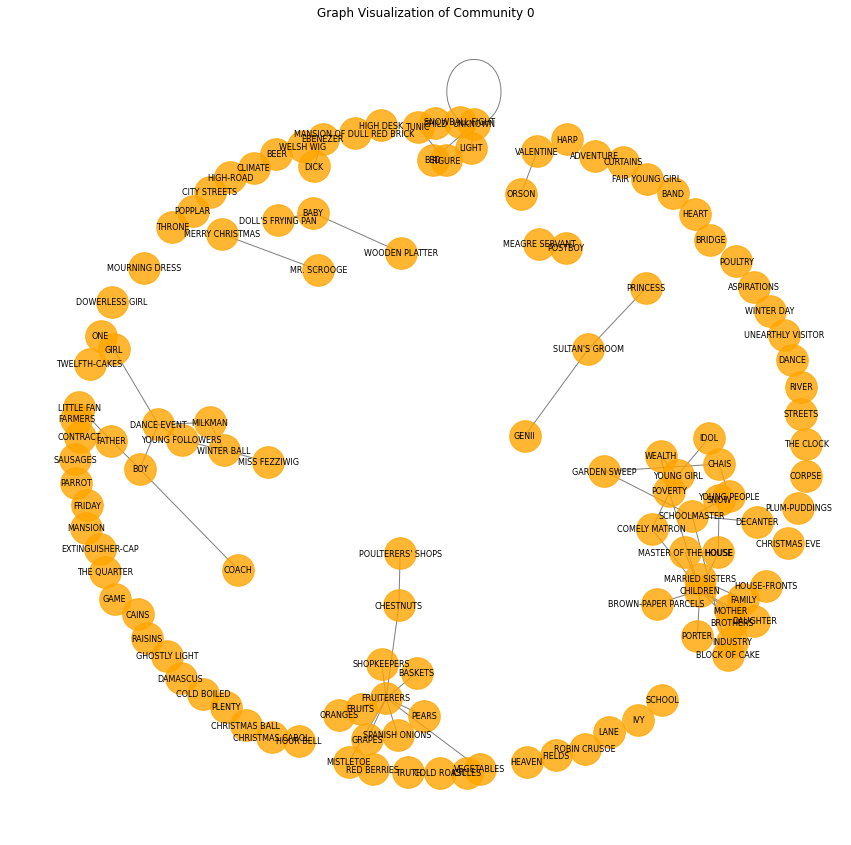

Graph with 126 nodes and 60 edges


In [11]:
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]
G_community_0 = G.subgraph(community_0_nodes)
plt.figure(figsize=(15, 15))
pos_community_0 = nx.spring_layout(G_community_0, k=2.5, iterations=400, threshold=1e-4)

nx.draw_networkx_nodes(G_community_0, pos_community_0, node_size=1000, node_color='orange', alpha=0.8)
nx.draw_networkx_edges(G_community_0, pos_community_0, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G_community_0, pos_community_0, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Community 0")
plt.axis('off') 
plt.show()

print(G_community_0)

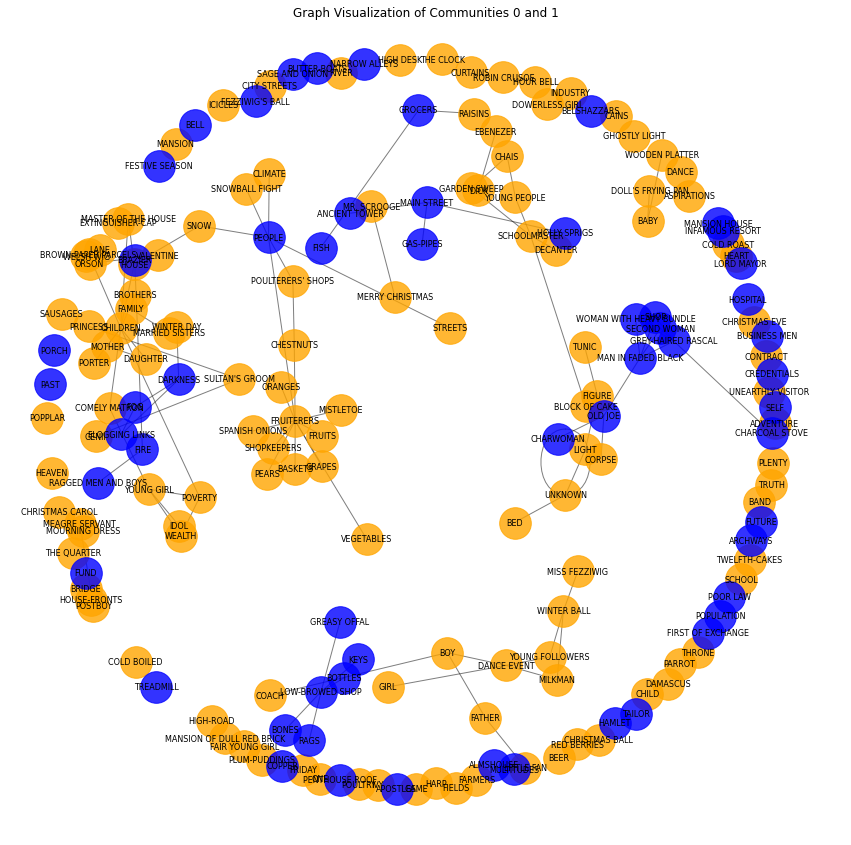

In [12]:
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]
community_1_nodes = [node for node, community_id in community_assignments.items() if community_id == 1]

combined_community_nodes = community_0_nodes + community_1_nodes
G_combined_communities = G.subgraph(combined_community_nodes)

plt.figure(figsize=(15, 15))
pos_combined = nx.spring_layout(G_combined_communities, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes for community 0
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_0_nodes, 
                       node_size=1000, node_color='orange', alpha=0.8)
# Draw nodes for community 1
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_1_nodes, 
                       node_size=1000, node_color='blue', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G_combined_communities, pos_combined, width=1, alpha=0.5, edge_color='black')

# Draw labels
nx.draw_networkx_labels(G_combined_communities, pos_combined, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Communities 0 and 1")
plt.axis('off')  # Turn off the axis
plt.show()

In [13]:
raisin_edges = list(G.edges('RAISINS'))

# Step 2: Count connections to each community
community_0_neighbors = sum(1 for _, target in raisin_edges if community_assignments[target] == 0)
community_1_neighbors = sum(1 for _, target in raisin_edges if community_assignments[target] == 1)

print(f"Connections to Community 0: {community_0_neighbors}")
print(f"Connections to Community 1: {community_1_neighbors}")
modularity_score = (community_0_neighbors - community_1_neighbors) / len(raisin_edges)
print(f"Modularity Score Contribution: {modularity_score}")

Connections to Community 0: 0
Connections to Community 1: 1
Modularity Score Contribution: -0.5


## A score that is less than 1 indicates that while there is a significant level of connectivity within the communities, there are also some connections to nodes outside of those communities. This can lead to the presence of isolated nodes that are part of a community but have limited or no internal connections.

## If the modularity score were to reach 1, it would imply a perfect community structure where every node within each community is connected exclusively to other nodes in the same community, with no edges leading to nodes in other communities. In such a case, no isolated nodes would exist within the communities because every node is connected to others within its community.

In [14]:
raisin_edges

[('RAISINS', 'GROCERS'), ('RAISINS', 'CUSTOMERS')]

### When calculating contributions of individual nodes, a negative score (like -0.5) implies that the existing community assignment is not optimal for that node.

### In other words, the modularity score contribution calculated as -0.5 suggests that placing RAISINS in community 0 would decrease the modularity score. This negative value reflects that the community structure would be less optimal if RAISINS were in community 0 compared to if it were in community 1.

# Characteristics of an Optimal Community Detection Model

## Dense Internal Connections:
### Nodes within the same community should have more edges connecting them than edges connecting to nodes in other communities.
## Fewer Isolated Nodes:
### Nodes in a community should not be isolated from each other.
## Balanced Edge Distribution:
### Nodes should not predominantly connect to nodes in other communities if they belong to a particular community.¶

In [15]:
print(G)

Graph with 686 nodes and 1049 edges


# Leiden Community
# (1): ModularityVertexPartition

In [16]:
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)
modularity_score_igraph = igraph.modularity(partition)  
print(f"Modularity Score from iGraph of Leiden: {modularity_score_igraph}")

Modularity Score from iGraph of Leiden: 0.656364361719046


## If the modularity score is high but not perfect like 0.65, it can still accommodate scenarios where some nodes might not connect internally. This indicates that while the community has a strong internal structure, there may be exceptions where certain nodes connect more strongly to external communities.

# Louvain Community

In [17]:
import community as community_louvain

louvain_partition = community_louvain.best_partition(G)

louvain_community_list = {}
for node, community_id in louvain_partition.items():
    if community_id not in louvain_community_list:
        louvain_community_list[community_id] = []
    louvain_community_list[community_id].append(node)

louvain_community_list = list(louvain_community_list.values())

modularity_score_louvain = nx.algorithms.community.modularity(G, louvain_community_list)
print(f"Modularity Score from Louvain Communities: {modularity_score_louvain}")

Modularity Score from Louvain Communities: 0.5895086176982199


# Greedy Modularity Community

In [18]:
import networkx as nx
greedy_communities = nx.algorithms.community.greedy_modularity_communities(G)
greedy_community_list = [list(community) for community in greedy_communities]
modularity_score = nx.algorithms.community.modularity(G, greedy_community_list)

print(f"Modularity Score of Greedy: {modularity_score}")

Modularity Score of Greedy: 0.5237378759825437


In [141]:
import networkx as nx
greedy_communities2 = nx.algorithms.community.greedy_modularity_communities(G,resolution=0.5)
greedy_community_list2 = [list(community) for community in greedy_communities2]
modularity_score2 = nx.algorithms.community.modularity(G, greedy_community_list2)

print(f"Modularity Score of Greedy: {modularity_score2}")

Modularity Score of Greedy: 0.40505823638162114


In [142]:
import networkx as nx
greedy_communities3 = nx.algorithms.community.greedy_modularity_communities(G,resolution=1.5)
greedy_community_list3 = [list(community) for community in greedy_communities3]
modularity_score3 = nx.algorithms.community.modularity(G, greedy_community_list3)

print(f"Modularity Score of Greedy: {modularity_score3}")

Modularity Score of Greedy: 0.5163784375243562


In [144]:
len(greedy_communities3)

100

## Higher modularity scores suggest that the communities are well-defined, with more intra-community edges and fewer inter-community edges.

## Modular Score of 1: Indicates a perfect modularity score, meaning all edges are within communities, and no edges connect different communities.

## A score closer to 1 indicates better-defined communities. A score above 0.3 is generally considered good, while a score below 0.3 may suggest poorly defined communities.

## A modularity score of 0 indicates that the detected community structure is essentially equivalent to a random model. In other words, there is no significant difference between the actual connections in the communities and the expected connections under random conditions.

## In summary, a modularity score of 0 suggests that the community structure identified is random and does not provide any useful insight into the underlying relationships in the graph. I

In [19]:
louvain_partition

{'PROJECT GUTENBERG': 0,
 'CHARLES DICKENS': 1,
 'ARTHUR RACKHAM': 1,
 'A CHRISTMAS CAROL': 1,
 'PHILADELPHIA': 1,
 'NEW YORK': 1,
 'JANET BLENKINSHIP': 1,
 'ONLINE DISTRIBUTED PROOFREADING TEAM': 1,
 'SUZANNE SHELL': 1,
 'J. B. LIPPINCOTT COMPANY': 1,
 'EBENEZER SCROOGE': 1,
 'GREAT BRITAIN': 2,
 'ISBN 0-397-00033-2': 3,
 'GHOST': 4,
 'BOB CRATCHIT': 5,
 'PETER CRATCHIT': 5,
 'TIM CRATCHIT': 5,
 'MR. FEZZIWIG': 1,
 'FRED': 17,
 'GHOST OF CHRISTMAS PAST': 1,
 'GHOST OF CHRISTMAS PRESENT': 4,
 'GHOST OF CHRISTMAS YET TO COME': 1,
 'GHOST OF JACOB MARLEY': 1,
 'FEZZIWIG': 7,
 'JOE': 10,
 'MR. TOPPER': 9,
 'DICK WILKINS': 1,
 'BELLE': 1,
 'CAROLINE': 10,
 'MRS. CRATCHIT': 5,
 'BELINDA CRATCHIT': 5,
 'MARTHA CRATCHIT': 5,
 'MRS. DILBER': 10,
 'FAN': 11,
 'MRS. FEZZIWIG': 7,
 "MARLEY'S GHOST": 4,
 'THE FIRST OF THE THREE SPIRITS': 12,
 'CHRISTMAS EVE': 7,
 "FEZZIWIG'S BALL": 1,
 'CORNHILL': 4,
 'THE THREE SPIRITS': 1,
 'CHRISTMAS': 11,
 'THE CRATCHIT FAMILY': 17,
 'JACOB MARLEY': 4,
 'OLD S

In [68]:
len(set(louvain_partition.values()))

96

In [20]:
greedy_communities

[frozenset({'ABELS',
            'ABRAHAMS',
            'ALI BABA',
            'ANGELIC MESSENGERS',
            'ANIMAL',
            'APOSTLES',
            'APPEARANCE',
            'AROMATIC VINEGAR',
            "BANKER'S BOOK",
            'BED',
            'BEDLAM',
            'BEDPOST',
            'BEDROOM',
            'BEEF',
            'BELSHAZZARS',
            'BELT',
            'BODY',
            'BOY',
            'BRAIDED HAIR',
            'BRIDGE',
            'BUSINESSMEN',
            'BUTTER-BOATS',
            'CAB',
            'CAINS',
            'CHAIR',
            'CHAMBER',
            'CHAMBERS',
            'CHEESE',
            'CHRISTMAS CAROL',
            'CHRISTMAS TIME',
            'CHURCH',
            'CHURCH AND CHAPEL',
            'CHURCHES',
            'CITY OF LONDON',
            'CITY STREETS',
            'CLOCK',
            'COACH',
            'COLD',
            'CORNER',
            'CROWD',
            'CURTAINS',
         

In [63]:
len(greedy_communities)

97

## frozenset is immutable, meaning it cannot be changed after creation.

# Leiden Algorithm 

## (1): Initialization: Start with each node as its own community.
## (2): First Phase (Refinement):
### For each node, evaluate its neighborhood and consider moving the node to a neighboring community if it increases modularity.This process is repeated until no further improvements can be made.
## (3): Second Phase (Aggregation):
### Create a new graph where each community identified in the first phase is a node, and edges between communities are created based on the edges in the original graph.
## (4): Repeat:
### Apply the first phase to the new aggregated graph to identify more communities. Continue this process until no further improvements are possible.
## (5): Output: Final community structure and modularity score.
## The Leiden algorithm incorporates an aggregation step and refines communities iteratively, providing greater stability and often higher modularity scores

# Louvain Method

## (1): Initialization: Start with each node as its own community.
## (2): Modularity Optimization:
### For each node, evaluate its community and consider moving it to neighboring communities to maximize modularity.Continue this step iteratively until no single move can increase modularity.
## (3): Aggregation:
### Form a new graph where each community is represented as a single node, with edges based on the connections between communities in the original graph.
## (4): Repeat:
### Apply the same optimization procedure to the new graph to find larger communities.Continue this process until no further improvements can be made.
## (5): Output: Final community structure and modularity score.
## The Louvain method emphasizes maximizing modularity in each step but does not necessarily ensure the same level of stability or convergence as the Leiden method.

# Greedy Modularity

## (1): Initialization: Start with each node as its own community.
## (2): Greedy Optimization:
### Iteratively merge communities based on the maximum increase in modularity.At each step, evaluate all possible merges and choose the one that yields the highest increase in modularity.
## (3): Termination:
### Stop when no further merges can improve the modularity score.
## (4): Output: Final community structure and modularity score.
## The Greedy Modularity method is more straightforward and relies on a greedy heuristic, which can lead to local optima rather than the best global community structure. It does not incorporate the iterative refinement or aggregation steps found in the Leiden and Louvain methods.

# 1: Refinement Process:
## Leiden and Louvain algorithms involve iterative refinement of communities to maximize modularity.
## Greedy directly merges communities without refinement, leading to potentially suboptimal results.
# 2: Aggregation Step:
## Leiden and Louvain both create a new graph based on identified communities and apply the algorithm again, while Greedy does not.
# 3: Modularity Optimization:
## Both Leiden and Louvain aim to maximize modularity during community identification but may differ in the stability and efficiency of their approaches.

In [21]:
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)

# (1): ModularityVertexPartition --20 clusters
# modularity score: 0.6567942050216237 & 20 clusters
## Implements modularity. This quality function is well-defined only for positive edge weights.

In [61]:
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)
modularity_score_igraph = igraph.modularity(partition)  
print(f"Modularity Score from ModularityVertexPartition: {modularity_score_igraph}")

Modularity Score from ModularityVertexPartition: 0.6567942050216237


In [62]:
print(partition)

Clustering with 610 elements and 20 clusters
[ 0] SCROOGE, SHIP, HOLLY, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL,
     POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK,
     CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT, STAIRS, GRUEL,
     SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, SLIPPERS, CAINS,
     ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS,
     ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD,
     CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE,
     CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE VISITATION, THE CLOCK,
     THE CHIME, THE QUARTER, HOUR BELL, CURTAINS, UNEARTHLY VISITOR, WELFARE,
     BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF DULL RED
     BRICK, ALI BABA, POPPLAR, DAMASCUS, VALENTINE, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWE

# (2): RBConfigurationVertexPartition 
# Maximum Modularity Score: 0.657676610617402 & 19 clusters
## Implements Reichardt and Bornholdt’s Potts model with a configuration null model. This quality function is well-defined only for positive edge weights. This quality function uses a linear resolution parameter.

In [71]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=1.0)
modularity_score_igraph2 = igraph.modularity(partition2)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2}")

Modularity Score from RBConfigurationVertexPartition: 0.6553960783387147


In [72]:
print(partition2)

Clustering with 610 elements and 20 clusters
[ 0] SCROOGE, SHIP, HOLLY, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL,
     POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK,
     CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT, STAIRS, GRUEL,
     SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, SLIPPERS, CAINS,
     ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS,
     ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD,
     CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE,
     CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE VISITATION, THE CLOCK,
     THE CHIME, THE QUARTER, HOUR BELL, CURTAINS, UNEARTHLY VISITOR, WELFARE,
     BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF DULL RED
     BRICK, ALI BABA, POPPLAR, DAMASCUS, VALENTINE, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWE

In [73]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_2 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=3.0)
modularity_score_igraph2_2 = igraph.modularity(partition2_2)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_2}")

Modularity Score from RBConfigurationVertexPartition: 0.634326032055587


In [74]:
print(partition2_2)

Clustering with 610 elements and 40 clusters
[ 0] SCROOGE, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, POPULATION,
     ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF
     LONDON, KEY, WINE-MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-
     ROOM, DRESSING-GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS
     OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-
     BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE,
     WARD, WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE,
     FRIDAY, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN,
     BRAIDED HAIR, LITTLE SHOE, EXTINGUISHER-

In [75]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_3 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=6.0)
modularity_score_igraph2_3 = igraph.modularity(partition2_3)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_3}")

Modularity Score from RBConfigurationVertexPartition: 0.5847045758773394


In [76]:
print(partition2_3)

Clustering with 610 elements and 59 clusters
[ 0] SCROOGE, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, UNION WORKHOUSES, TREADMILL, ST. DUNSTAN, HAT,
     TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF LONDON, KEY, WINE-
     MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-
     GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA,
     ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS,
     SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD,
     WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE
     VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL, CURTAINS,
     WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF
     DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN, BRAIDED
     HAIR, LITTLE SHOE, EXTINGUISHER-CAP, ONE, GHOSTLY LIGHT

In [77]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_4 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=10.0)
modularity_score_igraph2_4 = igraph.modularity(partition2_4)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_4}")

Modularity Score from RBConfigurationVertexPartition: 0.46601738820666305


In [78]:
print(partition2_4)

Clustering with 610 elements and 180 clusters
[  0] CHRISTMAS, POULTERERS, TAILOR, RAGGED MEN, BERRIES, IVY, THRONE, RED
      BERRIES, TURKEYS, GEESE, GAME, POULTRY, BRAWN, MEAT, PIGS, SAUSAGES,
      OYSTERS, PIES, PUDDINGS, FRUIT, PUNCH
[  1] FEZZIWIG, DICK, MRS. FEZZIWIG, WELSH WIG, EBENEZER, DANCE, COLD ROAST,
      COLD BOILED, MINCE-PIES, BEER, FESTIVITIES, SIR ROGER DE COVERLEY,
      DOMESTIC BALL, APPRENTICES, CHRISTMAS BALL
[  2] SPIRIT, BAKERS' SHOPS, PRISONS, COUNTRY ROAD, FIELDS, CHRISTMAS
      HOLIDAYS, PAST, FUTURE, ALMSHOUSE, HOSPITAL, GAOL, IGNORANCE, WANT,
      WORKHOUSES, MYSTERY
[  3] PROJECT GUTENBERG, FULL LICENSE, TERMS OF THIS AGREEMENT, WORLD,
      COPYRIGHT HOLDER, USER, GUTENBERG LICENSE, PLAIN VANILLA ASCII,
      COPYRIGHT, ROYALTY FEE, AGREEMENT, MICHAEL S. HART, EBOOK, VOLUNTEER,
      DONATION
[  4] GROCERS, CUSTOMERS, GROCER, FISH, ALMONDS, CINNAMON, RAISINS, TEA,
      COFFEE, SPICES, CANISTERS, CANDIED FRUITS, FIGS, FRENCH PLUMS
[  5] MISTLETOE, F

# When we increase the resolution_parameter, the modularity score will decrease and the number of clusters will increase. While we decrease the resolution_parameter under 1.0, the modularity score will also decrease but the number of clusters will decrease

In [79]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_5 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=0.5)
modularity_score_igraph2_5 = igraph.modularity(partition2_5)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_5}")

Modularity Score from RBConfigurationVertexPartition: 0.637812488356517


In [80]:
print(partition2_5)

Clustering with 610 elements and 12 clusters
[ 0] SCROOGE, FAN, MARLEY'S GHOST, BELL, PHANTOM, SHIP, SELF, DEATH, DINING-
     ROOM, HOLLY, FATHER, BOY, WINE-MERCHANT'S CELLAR, HAUNTED HOUSE, DOOR,
     PHANTOMS, BLEAK, DARK NIGHT, GUILTY GOVERNMENTS, CHAINS, NEPHEW, HAMLET'S
     FATHER, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, CHURCH,
     POPULATION, ANCIENT TOWER, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER,
     BANKER'S BOOK, CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT,
     STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN,
     SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC
     MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, ROOM, SENSES,
     BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN,
     POOR ABODE, CROWD, GHOSTS, INVISIBLE WORLD, WINDOW, CHAMBER, CLOCK, COLD,
     TIME, THE VISITATION, THE CLOCK, THE CHIM

In [81]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_6 = la.find_partition(igraph, la.RBConfigurationVertexPartition,resolution_parameter=0.1)
modularity_score_igraph2_6 = igraph.modularity(partition2_6)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_6}")

Modularity Score from RBConfigurationVertexPartition: 0.142837474702404


In [82]:
print(partition2_6)

Clustering with 610 elements and 8 clusters
[0] A CHRISTMAS CAROL, CHARLES DICKENS, EBENEZER SCROOGE, ARTHUR RACKHAM,
    PHILADELPHIA, NEW YORK, SUZANNE SHELL, JANET BLENKINSHIP, ONLINE
    DISTRIBUTED PROOFREADING TEAM, J. B. LIPPINCOTT COMPANY, GHOST, GREAT
    BRITAIN, SCROOGE, BOB CRATCHIT, MR. FEZZIWIG, FRED, GHOST OF CHRISTMAS
    PAST, GHOST OF CHRISTMAS PRESENT, GHOST OF CHRISTMAS YET TO COME, GHOST OF
    JACOB MARLEY, DICK WILKINS, BELLE, FAN, MARLEY'S GHOST, CHRISTMAS EVE,
    FEZZIWIG'S BALL, JACOB MARLEY, THE THREE SPIRITS, CHRISTMAS, SCROOGE AND
    MARLEY, HAMLET, NIGHT, SCROOGE'S HOUSE, CHAIN, COUNTING-HOUSE, MONEY-
    CHANGING HOLE, MARLEY, BELL, FIRST OF EXCHANGE, FEZZIWIG, TINY TIM,
    SPIRIT, CHURCHYARD, PHANTOM, GRAVE, PEOPLE, FIREPLACE, HAPPINESS, JACOB,
    SPECTRE, THREE SPIRITS, TWELVE, STAVE TWO, MIST, MERRY CHRISTMAS, CHILD,
    MASTER SCROOGE, DICK, MR. SCROOGE, BAKER'S, SURPLUS POPULATION, BLAZE,
    LAMPLIGHTER, SCOURGE, SHIP, SCROOGE'S NIECE, PARTY, TW

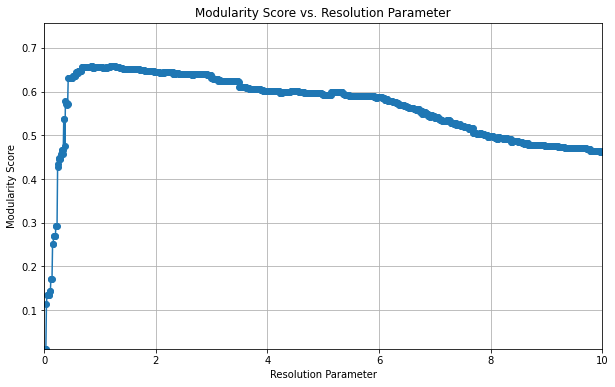

In [122]:
import matplotlib.pyplot as plt
import numpy as np
resolution2= list(np.linspace(0, 10, 1000))
modularity = []

for resolution in resolution2:
    partition = leidenalg.find_partition(igraph, la.RBConfigurationVertexPartition,
                                         resolution_parameter=resolution)
    modularity_score = igraph.modularity(partition)
    modularity.append(modularity_score)
    
plt.figure(figsize=(10, 6))
plt.plot(resolution2, modularity, marker='o')
plt.title('Modularity Score vs. Resolution Parameter')
plt.xlabel('Resolution Parameter')
plt.ylabel('Modularity Score')
plt.xlim(0, 10)  
plt.ylim(min(modularity), max(modularity)+0.1)  
plt.grid(True)
plt.show()

In [124]:
max_modularity = max(modularity)
max_index = modularity.index(max_modularity)
optimal_resolution = resolution2[max_index]

print(f"Optimal Resolution Parameter: {optimal_resolution}")
print(f"Maximum Modularity Score: {max_modularity}")
max_index

Optimal Resolution Parameter: 0.8408408408408409
Maximum Modularity Score: 0.657676610617402


84

# RBConfigurationVertexPartition -- optimal 19 clusters

In [125]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition2_optimal = la.find_partition(igraph, la.RBConfigurationVertexPartition,
                                 resolution_parameter=0.8408408408408409)
modularity_score_igraph2_optimal = igraph.modularity(partition2_optimal)  
print(f"Modularity Score from RBConfigurationVertexPartition: {modularity_score_igraph2_optimal}")
print(partition2_optimal)

Modularity Score from RBConfigurationVertexPartition: 0.6561703415391298
Clustering with 610 elements and 19 clusters
[ 0] SCROOGE, SHIP, DINING-ROOM, HOLLY, NEPHEW, PARTNERSHIP, WINTER WEATHER,
     UNCLE, WORLD OF FOOLS, HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION
     WORKHOUSES, TREADMILL, POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED
     PARTNER, BANKER'S BOOK, CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-
     MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-
     GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA,
     ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS,
     SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD,
     WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE
     VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL, CURTAINS,
     UNEARTHLY VISITOR, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-
     ROAD, LANE, MANSION OF DULL RED BRICK, ALI BABA, POPPLA

# (3): RBERVertexPartition -- 25 clusters
# optimal modularity score: 0.6527620385659411 & 26 clusters
## Implements Reichardt and Bornholdt’s Potts model with an Erdős-Rényi null model. This quality function is well-defined only for positive edge weights. This quality function uses a linear resolution parameter.

In [52]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition3 = la.find_partition(igraph, la.RBERVertexPartition,resolution_parameter=1.0)
modularity_score_igraph3 = igraph.modularity(partition3)  
print(f"Modularity Score from RBERVertexPartition: {modularity_score_igraph3}")

Modularity Score from RBERVertexPartition: 0.6524548778127246


In [54]:
print(partition3)

Clustering with 610 elements and 25 clusters
[ 0] SCROOGE, SHIP, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, POPULATION,
     ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF
     LONDON, KEY, WINE-MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-
     ROOM, DRESSING-GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS
     OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-
     BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE,
     WARD, WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE,
     FRIDAY, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN,
     BRAIDED HAIR, LITTLE SHOE, EXTINGU

In [83]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition3_2 = la.find_partition(igraph, la.RBERVertexPartition,resolution_parameter=5.0)
modularity_score_igraph3_2 = igraph.modularity(partition3_2)  
print(f"Modularity Score from RBERVertexPartition: {modularity_score_igraph3_2}")

Modularity Score from RBERVertexPartition: 0.551365365898432


In [84]:
print(partition3_2)

Clustering with 610 elements and 139 clusters
[  0] BOB CRATCHIT, TINY TIM, CHILD, PETER CRATCHIT, TIM CRATCHIT, MRS.
      CRATCHIT, BELINDA CRATCHIT, MARTHA CRATCHIT, CRATCHIT HOUSE, CRATCHIT
      FAMILY, YOUNG CRATCHITS, CHRISTMAS DINNER, CHRISTMAS DAY, PETER,
      CRATCHIT'S HOUSE, CRATCHIT'S WIFE, GIRLS, COAL-SCUTTLE, GOOSE, BELINDA,
      CHRISTMAS PUDDING, BOB, CHRISTMAS PARTY, CRATCHITS, MARTHA, PUDDING,
      TOTAL-ABSTINENCE PRINCIPLE, CLOTH, FIRST PARTING, MILLINER, COUNTESS,
      LORD, WASH-HOUSE, SUNDAY, GREEN PLACE, MR. SCROOGE'S NEPHEW
[  1] SCROOGE, SHIP, HEART, TREADMILL, ST. DUNSTAN, DECEASED PARTNER, KEY,
      WINE-MERCHANT, LUMBER-ROOM, SLIPPERS, APOSTLES, SENSES, MUSTARD, GRAVY,
      CHAIR, APPEARANCE, WARD, CROWD, CHAMBER, TIME, MANSION, ALI BABA,
      PARROT, GHOSTLY LIGHT, TRANSFORMATION, PLUM-PUDDINGS, CHURCH AND CHAPEL,
      INCENSE, POOR MAN'S CHILD, HELMSMAN, LOOK-OUT, OFFICERS, LONDON,
      LAOCOON, CHURCHES, POULTERER
[  2] DEATH, LAUGHTER, WOMAN, 

# The same pattern as the RBConfigurationVertexPartition when we change the resolution_parameter

In [85]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition3_3 = la.find_partition(igraph, la.RBERVertexPartition,resolution_parameter=0.5)
modularity_score_igraph3_3 = igraph.modularity(partition3_3)  
print(f"Modularity Score from RBERVertexPartition: {modularity_score_igraph3_3}")

Modularity Score from RBERVertexPartition: 0.5931156005856049


In [86]:
print(partition3_3)

Clustering with 610 elements and 21 clusters
[ 0] EBENEZER SCROOGE, GHOST, SCROOGE, GHOST OF CHRISTMAS PAST, GHOST OF
     CHRISTMAS YET TO COME, GHOST OF JACOB MARLEY, DICK WILKINS, BELLE, FAN,
     MARLEY'S GHOST, CHRISTMAS EVE, FEZZIWIG'S BALL, JACOB MARLEY, THE THREE
     SPIRITS, SCROOGE AND MARLEY, HAMLET, NIGHT, SCROOGE'S HOUSE, CHAIN,
     COUNTING-HOUSE, MONEY-CHANGING HOLE, MARLEY, BELL, FIRST OF EXCHANGE,
     SPIRIT, CHURCHYARD, PHANTOM, GRAVE, FIREPLACE, HAPPINESS, SPECTRE, THREE
     SPIRITS, TWELVE, STAVE TWO, MIST, MERRY CHRISTMAS, BAKER'S, SURPLUS
     POPULATION, BLAZE, LAMPLIGHTER, SCOURGE, SHIP, TWELFTH-NIGHT PARTY,
     CHILDREN, SPIRIT'S ROBE, PORCH, TOWN, SELF, FAMILY, YOUNG GIRL, IDOL,
     MASTER OF THE HOUSE, FATHER, BOY, WINE-MERCHANT'S CELLAR, HAUNTED HOUSE,
     DOOR, PHANTOMS, BLEAK, DARK NIGHT, GUILTY GOVERNMENTS, CHAINS, CLERK,
     CITY, STAVE ONE, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, PRISONS, UN

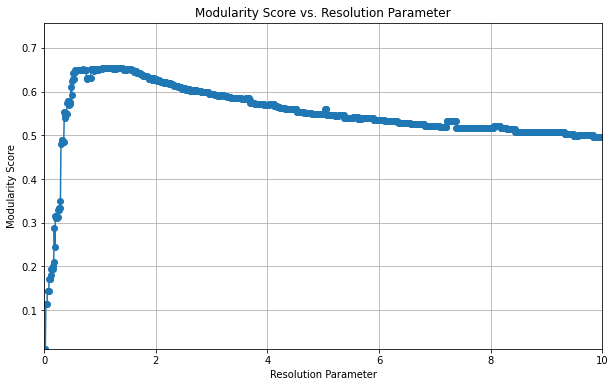

In [126]:
import matplotlib.pyplot as plt
import numpy as np
resolution2= list(np.linspace(0, 10, 1000))
modularity2 = []

for resolution in resolution2:
    partition = leidenalg.find_partition(igraph, la.RBERVertexPartition,
                                         resolution_parameter=resolution)
    modularity_score = igraph.modularity(partition)
    modularity2.append(modularity_score)
    
plt.figure(figsize=(10, 6))
plt.plot(resolution2, modularity2, marker='o')
plt.title('Modularity Score vs. Resolution Parameter')
plt.xlabel('Resolution Parameter')
plt.ylabel('Modularity Score')
plt.xlim(0, 10)  
plt.ylim(min(modularity), max(modularity)+0.1)  
plt.grid(True)
plt.show()

In [128]:
max_modularity2 = max(modularity2)
max_index2 = modularity2.index(max_modularity2)
optimal_resolution2 = resolution2[max_index2]

print(f"Optimal Resolution Parameter: {optimal_resolution2}")
print(f"Maximum Modularity Score: {max_modularity2}")

Optimal Resolution Parameter: 1.0410410410410411
Maximum Modularity Score: 0.6544636909635668


In [130]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition3_optimal = la.find_partition(igraph, la.RBERVertexPartition,resolution_parameter=1.0410410410410411)
modularity_score_igraph3_optimal = igraph.modularity(partition3_optimal)  
print(f"Modularity Score from optimal RBERVertexPartition: {modularity_score_igraph3_optimal}")

Modularity Score from optimal RBERVertexPartition: 0.6527620385659411


In [131]:
print(partition3_optimal)

Clustering with 610 elements and 26 clusters
[ 0] SCROOGE, SHIP, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, POPULATION,
     ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF
     LONDON, KEY, WINE-MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-
     ROOM, DRESSING-GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS
     OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-
     BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE,
     WARD, WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE,
     FRIDAY, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN,
     BRAIDED HAIR, LITTLE SHOE, EXTINGU

# (4): CPMVertexPartition Method 
# optimal modularity score:  0.6533204713554422 & 26 clusters
## Implements the Constant Potts Model (CPM). This quality function is well-defined for both positive and negative edge weights. This quality function uses a linear resolution parameter.



In [87]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=1)
modularity_score_igraph4 = igraph.modularity(partition4)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4}")

Modularity Score from CPMVertexPartition: -0.013834956529483163


In [88]:
print(partition4)

Clustering with 610 elements and 610 clusters
[  0] PROJECT GUTENBERG
[  1] A CHRISTMAS CAROL
[  2] FULL LICENSE
[  3] PROJECT GUTENBERG LITERARY ARCHIVE FOUNDATION
[  4] ELECTRONIC WORKS
[  5] TERMS OF THIS AGREEMENT
[  6] UNITED STATES
[  7] WORLD
[  8] PROJECT GUTENBERG LICENSE
[  9] COPYRIGHT HOLDER
[ 10] ELECTRONIC WORK
[ 11] USER
[ 12] GUTENBERG LICENSE
[ 13] PLAIN VANILLA ASCII
[ 14] COPYRIGHT
[ 15] ROYALTY FEE
[ 16] COPYRIGHT LAW
[ 17] PARAGRAPH 1.F.3
[ 18] AGREEMENT
[ 19] FOUNDATION
[ 20] GUTENBERG LITERARY ARCHIVE FOUNDATION
[ 21] MICHAEL S. HART
[ 22] WWW.GUTENBERG.ORG
[ 23] EBOOK
[ 24] VOLUNTEER
[ 25] DONATION
[ 26] CHARLES DICKENS
[ 27] EBENEZER SCROOGE
[ 28] ARTHUR RACKHAM
[ 29] PHILADELPHIA
[ 30] NEW YORK
[ 31] SUZANNE SHELL
[ 32] JANET BLENKINSHIP
[ 33] ONLINE DISTRIBUTED PROOFREADING TEAM
[ 34] J. B. LIPPINCOTT COMPANY
[ 35] GHOST
[ 36] GREAT BRITAIN
[ 37] SCROOGE
[ 38] BOB CRATCHIT
[ 39] MR. FEZZIWIG
[ 40] FRED
[ 41] GHOST OF CHRISTMAS PAST
[ 42] GHOST OF CHRISTMAS PR

In [89]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_2 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=0.1)
modularity_score_igraph4_2 = igraph.modularity(partition4_2)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_2}")

Modularity Score from CPMVertexPartition: 0.44207429836941287


In [90]:
print(partition4_2)

Clustering with 610 elements and 229 clusters
[  0] BOB CRATCHIT, TINY TIM, CHILD, PETER CRATCHIT, MRS. CRATCHIT, BELINDA
      CRATCHIT, MARTHA CRATCHIT, THE CRATCHIT FAMILY, CRATCHIT HOUSE, CRATCHIT
      FAMILY, YOUNG CRATCHITS, CHRISTMAS DINNER, CHRISTMAS DAY, PETER,
      CRATCHIT'S HOUSE, CRATCHIT'S WIFE, GIRLS, GOOSE, BELINDA, CHRISTMAS
      PARTY, CRATCHITS
[  1] WOMAN, CAROLINE, HUSBAND, MAN, DEBT, CORPSE, SPOIL, CONTRACT,
      ASPIRATIONS, INDUSTRY, BLANKETS, SHIRT
[  2] MARLEY'S GHOST, BELL, WINE-MERCHANT'S CELLAR, HAUNTED HOUSE, DOOR,
      PHANTOMS, BLEAK, DARK NIGHT, GUILTY GOVERNMENTS, CHAINS, GHOSTS, WOMAN
      WITH INFANT
[  3] MR. FEZZIWIG, CHRISTMAS EVE, FEZZIWIG, MRS. FEZZIWIG, HIGH DESK, COLD
      ROAST, MINCE-PIES, FESTIVITIES, SIR ROGER DE COVERLEY, DOMESTIC BALL,
      APPRENTICES
[  4] SCROOGE, SHIP, WINE-MERCHANT, CHEESE, WISE MEN, HELMSMAN, LOOK-OUT,
      OFFICERS, AROMATIC VINEGAR, SHADOW, CORNER
[  5] GHOST, DICK WILKINS, JACOB MARLEY, NIGHT, CHAIN, SP

In [91]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_3 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=0.01)
modularity_score_igraph4_3 = igraph.modularity(partition4_3)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_3}")

Modularity Score from CPMVertexPartition: 0.6384418043967609


In [92]:
print(partition4_3)

Clustering with 610 elements and 45 clusters
[ 0] SCROOGE, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, UNION WORKHOUSES, TREADMILL, HAT, TAVERN, DECEASED
     PARTNER, BANKER'S BOOK, CITY OF LONDON, KEY, WINE-MERCHANT, STAIRS,
     GRUEL, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, CAINS, ABELS, PHARAOH'S
     DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS,
     APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY,
     CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE, CROWD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, DAMASCUS, ROBIN CRUSOE, FRIDAY, PARROT,
     CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN, BRAIDED HAIR,
     LITTLE SHOE, EXTINGUISHER-CAP, ONE, GHOSTLY LIGHT, TRANSFORMATION, GESE,
     TWELFTH-CAKES, CHURCH AND CHAPEL, INCENSE, TORCH, P

In [93]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_4 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=0.001)
modularity_score_igraph4_4 = igraph.modularity(partition4_4)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_4}")

Modularity Score from CPMVertexPartition: 0.21068228763877914


In [94]:
print(partition4_4)

Clustering with 610 elements and 12 clusters
[ 0] A CHRISTMAS CAROL, CHARLES DICKENS, EBENEZER SCROOGE, ARTHUR RACKHAM,
     PHILADELPHIA, NEW YORK, SUZANNE SHELL, JANET BLENKINSHIP, ONLINE
     DISTRIBUTED PROOFREADING TEAM, J. B. LIPPINCOTT COMPANY, GHOST, GREAT
     BRITAIN, SCROOGE, BOB CRATCHIT, MR. FEZZIWIG, FRED, GHOST OF CHRISTMAS
     PAST, GHOST OF CHRISTMAS PRESENT, GHOST OF CHRISTMAS YET TO COME, GHOST
     OF JACOB MARLEY, DICK WILKINS, BELLE, FAN, MARLEY'S GHOST, CHRISTMAS EVE,
     FEZZIWIG'S BALL, JACOB MARLEY, THE THREE SPIRITS, CHRISTMAS, SCROOGE AND
     MARLEY, HAMLET, NIGHT, SCROOGE'S HOUSE, CHAIN, COUNTING-HOUSE, MONEY-
     CHANGING HOLE, MARLEY, BELL, FIRST OF EXCHANGE, FEZZIWIG, TINY TIM,
     SPIRIT, CHURCHYARD, PHANTOM, GRAVE, PEOPLE, FIREPLACE, HAPPINESS,
     SPECTRE, THREE SPIRITS, TWELVE, STAVE TWO, MIST, MERRY CHRISTMAS, CHILD,
     MASTER SCROOGE, DICK, MR. SCROOGE, BAKER'S, SURPLUS POPULATION, BLAZE,
     LAMPLIGHTER, SCOURGE, SHIP, SCROOGE'S NIECE, PA

In [140]:
import leidenalg as la
import igraph as ig
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_5 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=0.005)
modularity_score_igraph4_5 = igraph.modularity(partition4_5)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_5}")

Modularity Score from CPMVertexPartition: 0.6510022255523215


In [138]:
print(partition4_5)

Clustering with 610 elements and 25 clusters
[ 0] SCROOGE, SHIP, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, POPULATION,
     ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF
     LONDON, KEY, WINE-MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-
     ROOM, DRESSING-GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS
     OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-
     BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE,
     WARD, WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE,
     FRIDAY, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN,
     BRAIDED HAIR, LITTLE SHOE, EXTINGU

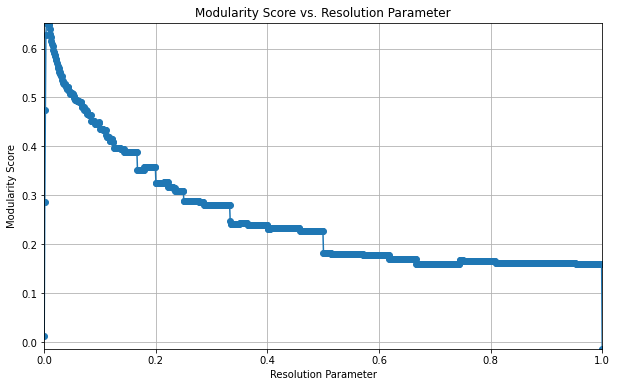

In [105]:
import matplotlib.pyplot as plt
resolution_parameters = list(np.linspace(0, 1, 1000))
modularity_scores = []

for resolution in resolution_parameters:
    partition = leidenalg.find_partition(igraph, la.CPMVertexPartition,
                                         resolution_parameter=resolution)
    modularity_score = igraph.modularity(partition)
    modularity_scores.append(modularity_score)
    
plt.figure(figsize=(10, 6))
plt.plot(resolution_parameters, modularity_scores, marker='o')
plt.title('Modularity Score vs. Resolution Parameter')
plt.xlabel('Resolution Parameter')
plt.ylabel('Modularity Score')
plt.xlim(0, 1)  
plt.ylim(min(modularity_scores), max(modularity_scores))  
plt.grid(True)
plt.show()

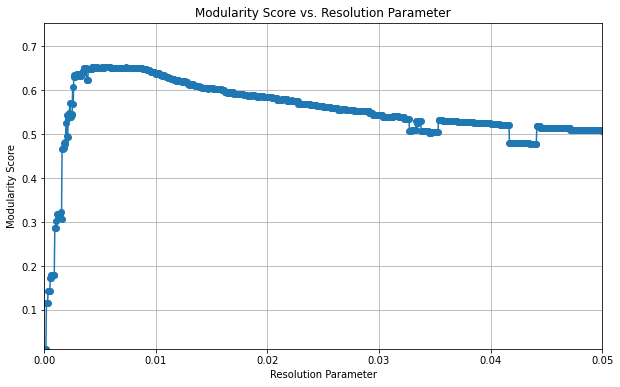

In [109]:
import matplotlib.pyplot as plt
resolution_parameters = list(np.linspace(0, 0.05, 1000))
modularity_scores = []

for resolution in resolution_parameters:
    partition = leidenalg.find_partition(igraph, la.CPMVertexPartition,
                                         resolution_parameter=resolution)
    modularity_score = igraph.modularity(partition)
    modularity_scores.append(modularity_score)
    
plt.figure(figsize=(10, 6))
plt.plot(resolution_parameters, modularity_scores, marker='o')
plt.title('Modularity Score vs. Resolution Parameter')
plt.xlabel('Resolution Parameter')
plt.ylabel('Modularity Score')
plt.xlim(0, 0.05)  
plt.ylim(min(modularity_scores), max(modularity_scores)+0.1)  
plt.grid(True)
plt.show()

In [132]:
max_modularity3 = max(modularity_scores)
max_index3 = modularity_scores.index(max_modularity3)
optimal_resolution3 = resolution_parameters[max_index3]

print(f"Optimal Resolution Parameter: {optimal_resolution3}")
print(f"Maximum Modularity Score: {max_modularity3}")

Optimal Resolution Parameter: 0.005605605605605606
Maximum Modularity Score: 0.6539888640595564


In [135]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_optimal = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=0.005605605605605606)
modularity_score_igraph4_optimal = igraph.modularity(partition4_optimal)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_optimal}")

Modularity Score from CPMVertexPartition: 0.6533204713554422


In [136]:
print(partition4_optimal)

Clustering with 610 elements and 26 clusters
[ 0] SCROOGE, SHIP, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, HEART,
     PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL, POPULATION,
     ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK, CITY OF
     LONDON, KEY, WINE-MERCHANT, STAIRS, GRUEL, SITTING-ROOM, BEDROOM, LUMBER-
     ROOM, DRESSING-GOWN, SLIPPERS, CAINS, ABELS, PHARAOH'S DAUGHTERS, QUEENS
     OF SHEBA, ANGELIC MESSENGERS, ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-
     BOATS, SENSES, BEEF, MUSTARD, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE,
     WARD, WISE MEN, POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER,
     TIME, THE VISITATION, THE CLOCK, THE CHIME, THE QUARTER, HOUR BELL,
     CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE,
     MANSION OF DULL RED BRICK, ALI BABA, POPPLAR, DAMASCUS, ROBIN CRUSOE,
     FRIDAY, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWERLESS GIRL, HEAVEN,
     BRAIDED HAIR, LITTLE SHOE, EXTINGU

# When resolution_parameter is 1.0, it treats every node as one community, when we decrease the parameter, the number of classes will decrease and the modularity score will increase first and decrease after achieve the maximum

In [99]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition4_6 = la.find_partition(igraph, la.CPMVertexPartition,resolution_parameter=3)
modularity_score_igraph4_6 = igraph.modularity(partition4_6)  
print(f"Modularity Score from CPMVertexPartition: {modularity_score_igraph4_6}")

Modularity Score from CPMVertexPartition: -0.013834956529483163


In [98]:
print(partition4_6)

Clustering with 610 elements and 610 clusters
[  0] PROJECT GUTENBERG
[  1] A CHRISTMAS CAROL
[  2] FULL LICENSE
[  3] PROJECT GUTENBERG LITERARY ARCHIVE FOUNDATION
[  4] ELECTRONIC WORKS
[  5] TERMS OF THIS AGREEMENT
[  6] UNITED STATES
[  7] WORLD
[  8] PROJECT GUTENBERG LICENSE
[  9] COPYRIGHT HOLDER
[ 10] ELECTRONIC WORK
[ 11] USER
[ 12] GUTENBERG LICENSE
[ 13] PLAIN VANILLA ASCII
[ 14] COPYRIGHT
[ 15] ROYALTY FEE
[ 16] COPYRIGHT LAW
[ 17] PARAGRAPH 1.F.3
[ 18] AGREEMENT
[ 19] FOUNDATION
[ 20] GUTENBERG LITERARY ARCHIVE FOUNDATION
[ 21] MICHAEL S. HART
[ 22] WWW.GUTENBERG.ORG
[ 23] EBOOK
[ 24] VOLUNTEER
[ 25] DONATION
[ 26] CHARLES DICKENS
[ 27] EBENEZER SCROOGE
[ 28] ARTHUR RACKHAM
[ 29] PHILADELPHIA
[ 30] NEW YORK
[ 31] SUZANNE SHELL
[ 32] JANET BLENKINSHIP
[ 33] ONLINE DISTRIBUTED PROOFREADING TEAM
[ 34] J. B. LIPPINCOTT COMPANY
[ 35] GHOST
[ 36] GREAT BRITAIN
[ 37] SCROOGE
[ 38] BOB CRATCHIT
[ 39] MR. FEZZIWIG
[ 40] FRED
[ 41] GHOST OF CHRISTMAS PAST
[ 42] GHOST OF CHRISTMAS PR

# (5): SignificanceVertexPartition 
# 149 clusters; not suitable for weighted graphs
## Implements Significance. This quality function is well-defined only for unweighted graphs.

In [57]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition5 = la.find_partition(igraph, la.SignificanceVertexPartition)
modularity_score_igraph5 = igraph.modularity(partition5)  
print(f"Modularity Score from SignificanceVertexPartition: {modularity_score_igraph5}")


Modularity Score from SignificanceVertexPartition: 0.5119997164669967


In [58]:
print(partition5)

Clustering with 610 elements and 149 clusters
[  0] SCROOGE, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS, BEDLAM, ST.
      DUNSTAN, TAVERN, BANKER'S BOOK, WINE-MERCHANT, STAIRS, SITTING-ROOM,
      BEDROOM, DRESSING-GOWN, CAINS, ABELS, QUEENS OF SHEBA, ABRAHAMS, BUTTER-
      BOATS, SENSES, CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN,
      POOR ABODE, CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, THE VISITATION,
      HOUR BELL, CURTAINS, WELFARE, BRIDGE, RIVER, MANSION, HIGH-ROAD, ALI
      BABA, POPPLAR, DAMASCUS, PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL,
      HEAVEN, EXTINGUISHER-CAP, ONE, GHOSTLY LIGHT, TRANSFORMATION, PLUM-
      PUDDINGS, CITY STREETS, CHURCH AND CHAPEL, INCENSE, TORCH, AROMATIC
      VINEGAR, MOLDY OLD OFFICE, LONDON, SHADOW, FURNITURE, PRESENT, CHRISTMAS
      TIME, BEDPOST, LAOCOON, CHURCHES, POULTERER, TURKEY, CAB, PORTLY
      GENTLEMAN, TANK
[  1] CHRISTMAS, POULTERERS, TAILOR, RAGGED MEN, BERRIES, IVY, THRONE, RED
      BERRIES, TURKEYS, 

# (6): SurpriseVertexPartition -- 171 clusters 
## Implements (asymptotic) Surprise. This quality function is well-defined only for positive edge weights.

In [59]:
import leidenalg as la
import igraph as ig

igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition6 = la.find_partition(igraph, la.SurpriseVertexPartition)
modularity_score_igraph6 = igraph.modularity(partition6)  
print(f"Modularity Score from SignificanceVertexPartition: {modularity_score_igraph6}")

Modularity Score from SignificanceVertexPartition: 0.5103089691848702


In [60]:
print(partition6)

Clustering with 610 elements and 171 clusters
[  0] SCROOGE, SHIP, PARTNERSHIP, WORLD OF FOOLS, GENTLEMEN, POPULATION, BEEF,
      CROWD, INVISIBLE WORLD, BRIDGE, MANSION OF DULL RED BRICK, DOWERLESS
      GIRL, LITTLE SHOE, PLUM-PUDDINGS, CITY STREETS, HELMSMAN, LOOK-OUT,
      OFFICERS, POOR CLERK, LONDON, BEDPOST, TURKEY
[  1] CHRISTMAS, POULTERERS, TAILOR, RAGGED MEN, BERRIES, IVY, THRONE, RED
      BERRIES, TURKEYS, GEESE, GAME, POULTRY, BRAWN, MEAT, PIGS, SAUSAGES,
      OYSTERS, PIES, PUDDINGS, FRUIT, PUNCH
[  2] BOB CRATCHIT, TINY TIM, CHILD, PETER CRATCHIT, MRS. CRATCHIT, BELINDA
      CRATCHIT, MARTHA CRATCHIT, CRATCHIT HOUSE, CRATCHIT FAMILY, YOUNG
      CRATCHITS, CHRISTMAS DINNER, CHRISTMAS DAY, PETER, CRATCHIT'S HOUSE,
      CRATCHIT'S WIFE, GIRLS, GOOSE, FIRE, BELINDA, CHRISTMAS PARTY, CRATCHITS
[  3] FRED, GHOST OF CHRISTMAS PRESENT, SCROOGE'S NIECE, PARTY, GOOD-HUMOUR,
      MULLED WINE, UNCLE SCROOGE, TOPPER, PLUMP SISTER, SCROOGE'S NEPHEW,
      SCROOGE'S NIECE'S SIS